In [30]:
import numpy as np
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AirQualityUCI.csv",sep=";",decimal=',')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
print("Total no. of columns : ",df.columns.value_counts().sum())
print('The shape of our data is : ',df.shape)

Total no. of columns :  17
The shape of our data is :  (9471, 17)


In [4]:
#checking if our dataset contains null values or not.
print(df.isna().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [5]:
#last two unnamed columns are removed.
df = df.iloc[:,:-2]
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

Delete all NAN values present in dataset.

In [6]:
df_clean = df.dropna().reset_index(drop=True)

In [7]:
#New shape of our dataset after removing those rows with null values.
print(df_clean.shape)

(9357, 15)


In [8]:
df_clean.tail(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


There are no missing values in dataset. But Actual missing values are tagged with "-200". This is mentioned in UCI repository documentation.

In [10]:
#Counting "-200" values.
df_clean.isin([-200]).sum(axis=0)

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


Handling missing values.

In [11]:
#first converting all the missing values to NaN.
df_clean = df_clean.replace(to_replace=-200,value=np.nan)

In [12]:
#Now replacing all NaN values with the mean value of dataset.
df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))

In [13]:
#checking replaced or not.
df_clean.isna().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [14]:
df_clean.tail(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


We have a time series data. We wil perform the task "Forecasting" here.

In [15]:
#converting data from DD-MM-YYYY to YYYY-MM-DD
date_convert_format = pd.to_datetime(df_clean['Date'], format='%d/%m/%Y')
print(date_convert_format)

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [16]:
time_convert_format = df_clean['Time']
time_convert_format = time_convert_format.apply(lambda x: x.replace('.',':'))

In [17]:
print(type(date_convert_format))
print(type(time_convert_format))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [18]:
#converting two series into one dataframe.
date_time = pd.concat([date_convert_format,time_convert_format],axis=1)
print(date_time)

           Date      Time
0    2004-03-10  18:00:00
1    2004-03-10  19:00:00
2    2004-03-10  20:00:00
3    2004-03-10  21:00:00
4    2004-03-10  22:00:00
...         ...       ...
9352 2005-04-04  10:00:00
9353 2005-04-04  11:00:00
9354 2005-04-04  12:00:00
9355 2005-04-04  13:00:00
9356 2005-04-04  14:00:00

[9357 rows x 2 columns]


In [19]:
print(date_time.shape)

(9357, 2)


In [20]:
date_time['ds'] = date_time['Date'].astype(str) + ' ' + date_time['Time'].astype(str)
print(date_time.head(5))

        Date      Time                   ds
0 2004-03-10  18:00:00  2004-03-10 18:00:00
1 2004-03-10  19:00:00  2004-03-10 19:00:00
2 2004-03-10  20:00:00  2004-03-10 20:00:00
3 2004-03-10  21:00:00  2004-03-10 21:00:00
4 2004-03-10  22:00:00  2004-03-10 22:00:00


In [21]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


In [22]:
#Now we have to convert ds from object to datetime format.
data = pd.DataFrame()
data['ds'] = pd.to_datetime(date_time['ds'])
data.head(5)

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [23]:
#RH meand Relative humidity.
data['y'] = df_clean['RH']
data.head(5)

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6


In [24]:
#training prophet model.
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c2trvde/bs29a6y_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c2trvde/2ntxkpgn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27205', 'data', 'file=/tmp/tmp9c2trvde/bs29a6y_.json', 'init=/tmp/tmp9c2trvde/2ntxkpgn.json', 'output', 'file=/tmp/tmp9c2trvde/prophet_modelsq5e0gyu/prophet_model-20250921073919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:39:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:39:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
future = model.make_future_dataframe(periods=365,freq='h')
future.tail()

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [26]:
forecast = model.predict()
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9352,2005-04-04 10:00:00,43.584537,28.322948,58.309225
9353,2005-04-04 11:00:00,38.787747,24.231957,52.891699
9354,2005-04-04 12:00:00,35.756599,21.015726,50.760753
9355,2005-04-04 13:00:00,34.278357,19.357636,49.539512
9356,2005-04-04 14:00:00,33.611236,18.373279,48.601203


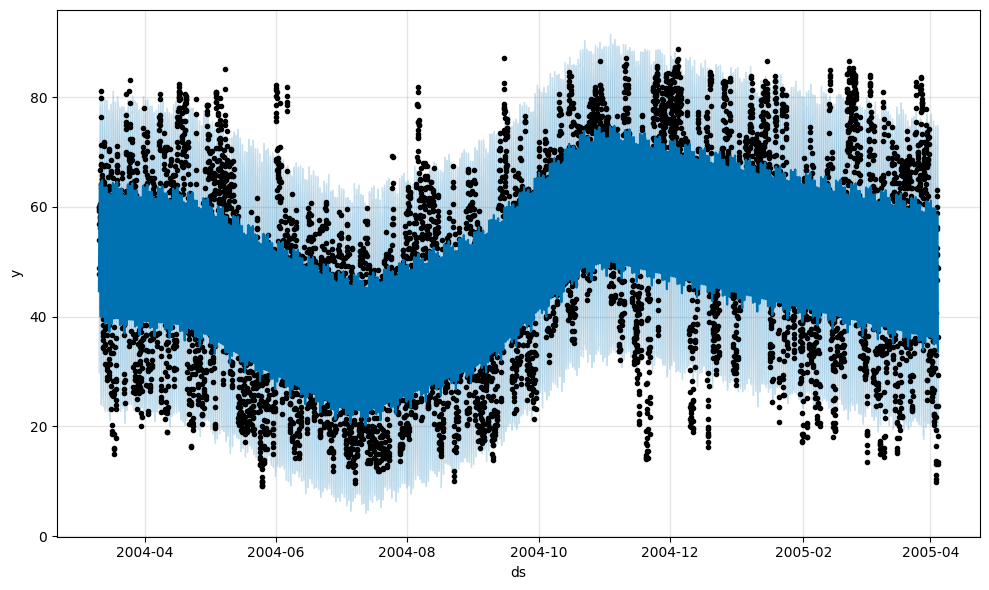

In [27]:
#plotting
figure1 = model.plot(forecast)

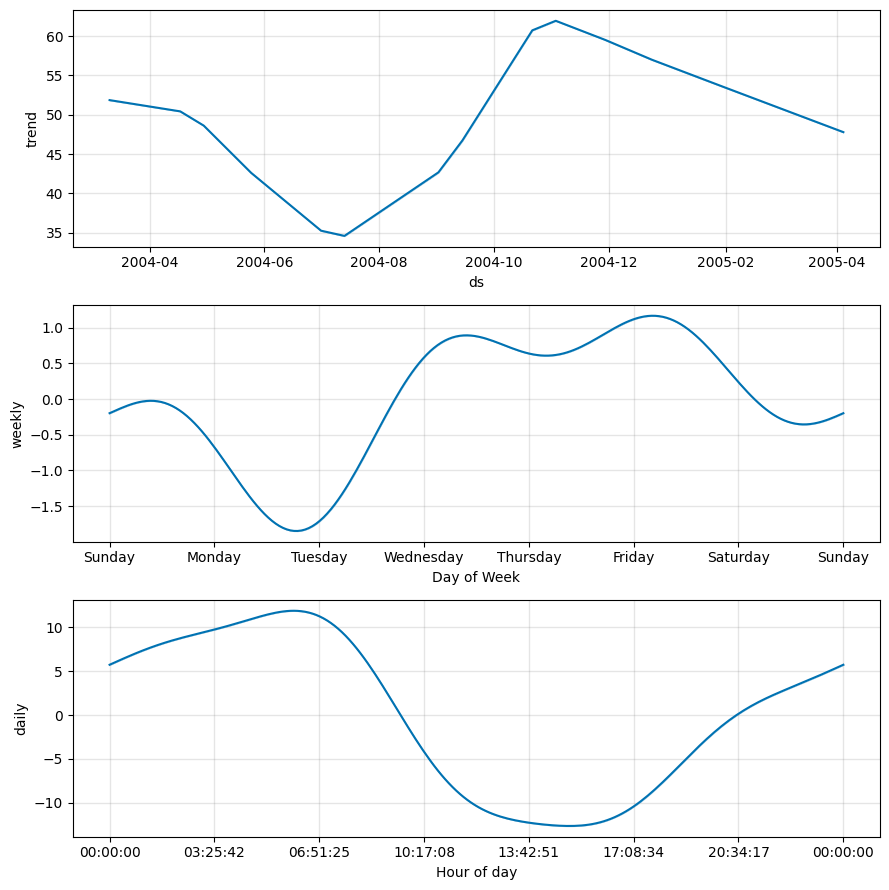

In [28]:
figure2 = model.plot_components(forecast)

In [29]:
#now we will calculate the correlation matrix to see how varaiables are correlated with each other.
corr_matrix = df_clean.corr(numeric_only=True)
print(corr_matrix)

                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.773394  0.289975  0.812361       0.795578   
PT08.S1(CO)    0.773394     1.000000  0.278282  0.883795       0.892964   
NMHC(GT)       0.289975     0.278282  1.000000  0.281928       0.279761   
C6H6(GT)       0.812361     0.883795  0.281928  1.000000       0.981950   
PT08.S2(NMHC)  0.795578     0.892964  0.279761  0.981950       1.000000   
NOx(GT)        0.762273     0.615941  0.098180  0.616801       0.601773   
PT08.S3(NOx)  -0.613877    -0.771938 -0.261997 -0.735744      -0.796703   
NO2(GT)        0.646349     0.562843  0.156510  0.535919       0.561180   
PT08.S4(NO2)   0.558232     0.682881  0.232979  0.765731       0.777254   
PT08.S5(O3)    0.759027     0.899324  0.240592  0.865689       0.880578   
T              0.020257     0.048627  0.066782  0.198956       0.241373   
RH             0.043198     0.114606 -0.052784 -0.061681      -0.090380   
AH             0.043274  

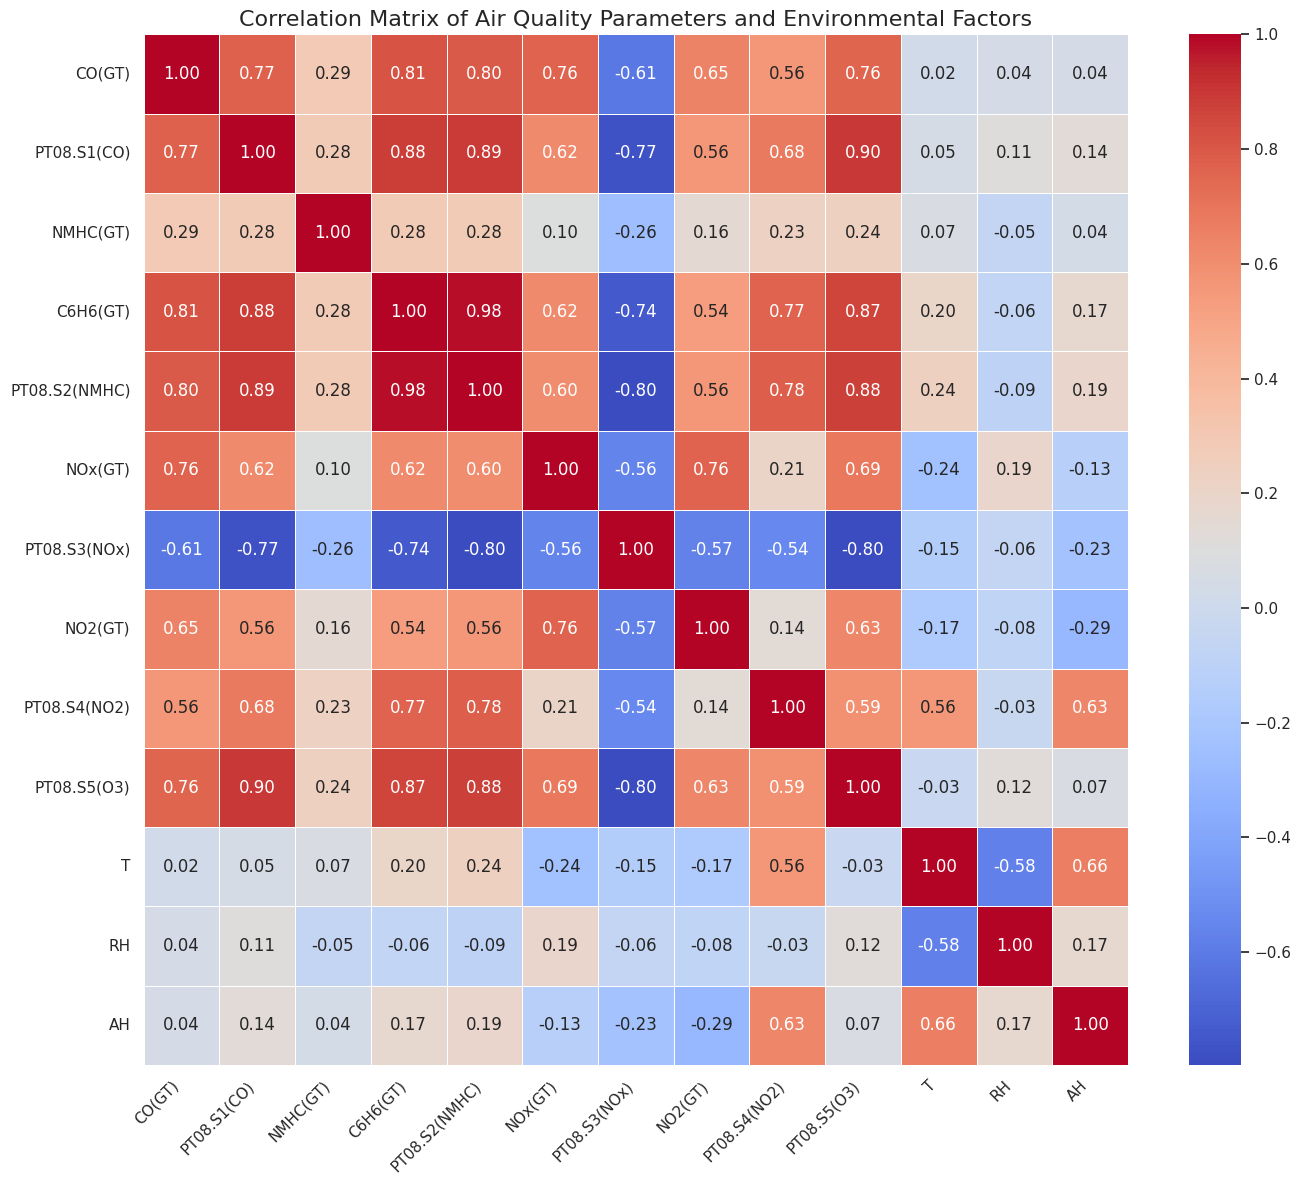

In [32]:
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.0)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Air Quality Parameters and Environmental Factors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
target_variable = 'CO(GT)'
prophet_data = pd.DataFrame()
prophet_data['ds'] = pd.to_datetime(date_time['ds'])
prophet_data['y'] = df_clean[target_variable]

display(prophet_data.head())

,ds,y
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


In [34]:
model = Prophet()
model.fit(prophet_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c2trvde/a47q0fs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c2trvde/_t0pzl3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7689', 'data', 'file=/tmp/tmp9c2trvde/a47q0fs1.json', 'init=/tmp/tmp9c2trvde/_t0pzl3b.json', 'output', 'file=/tmp/tmp9c2trvde/prophet_model67v8qrq0/prophet_model-20250921075357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=365, freq='h')
display(future.tail())

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [36]:
forecast = model.predict(future)
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,1.902328,0.562776,3.246409
9718,2005-04-19 16:00:00,2.142878,0.757491,3.463057
9719,2005-04-19 17:00:00,2.554207,1.326183,3.950502
9720,2005-04-19 18:00:00,2.991605,1.654066,4.384625
9721,2005-04-19 19:00:00,3.207758,1.896431,4.557216


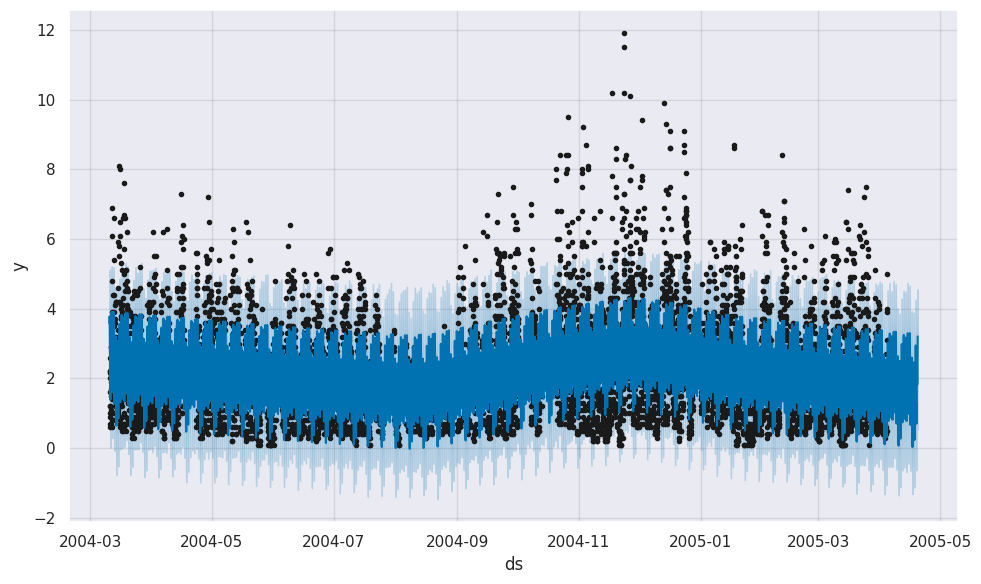

In [37]:
#Plot the forecast
figure1 = model.plot(forecast)

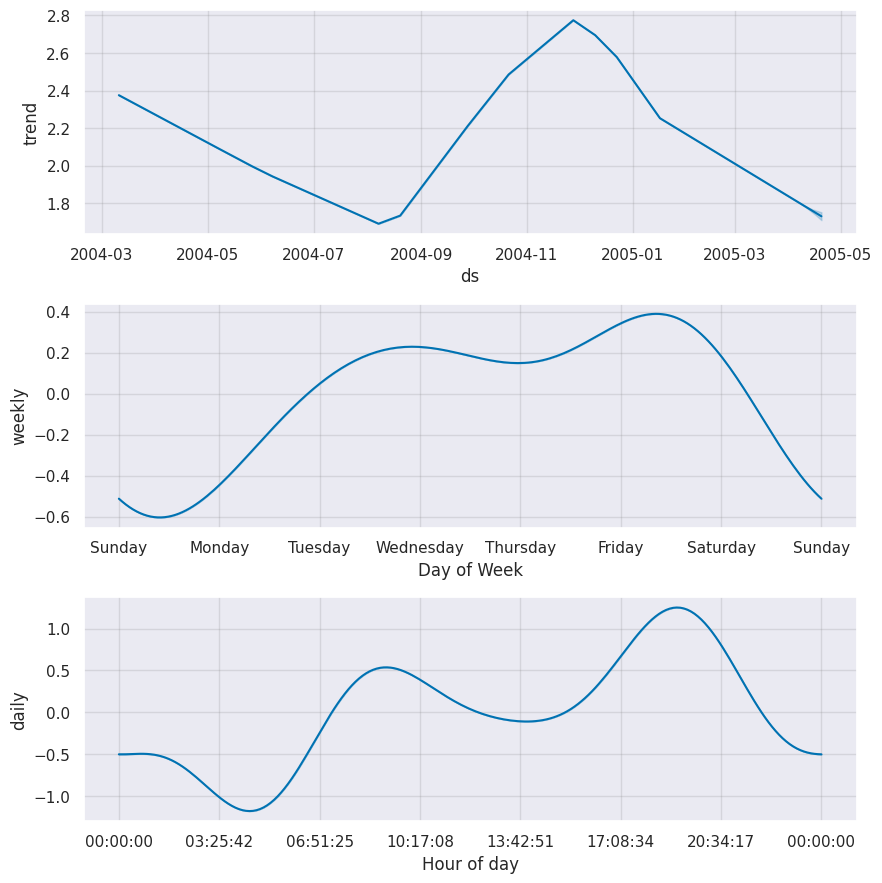

In [38]:
#Plot the forecast components (trend, weekly seasonality, daily seasonality)
figure2 = model.plot_components(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c2trvde/fck7a4ag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c2trvde/yte3ji64.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78101', 'data', 'file=/tmp/tmp9c2trvde/fck7a4ag.json', 'init=/tmp/tmp9c2trvde/yte3ji64.json', 'output', 'file=/tmp/tmp9c2trvde/prophet_model_3ky1zbn/prophet_model-20250921075921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


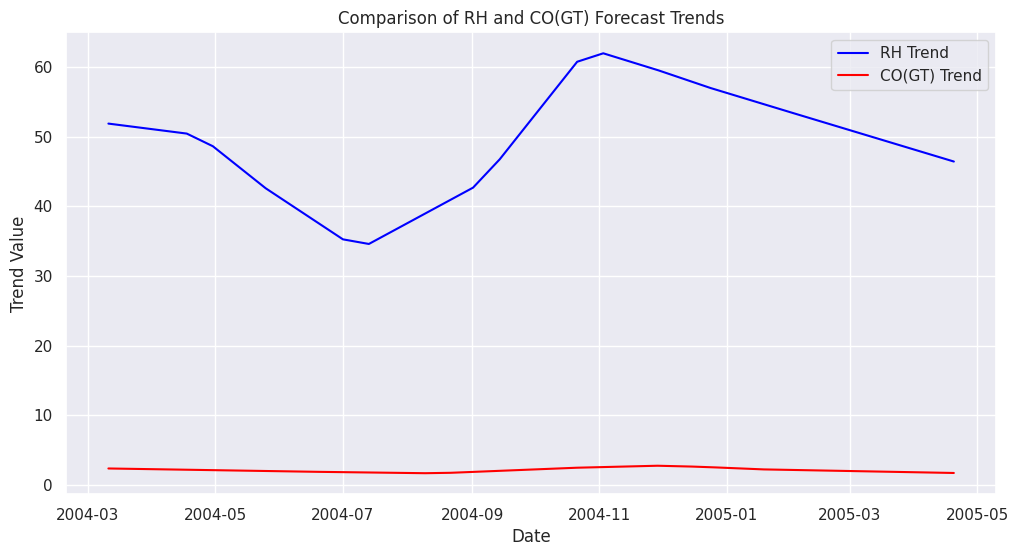

In [41]:
model_rh = Prophet()
model_rh.fit(data)
future_rh = model_rh.make_future_dataframe(periods=365, freq='h')
forecast_rh = model_rh.predict(future_rh)

forecast_co = forecast

trend_rh = forecast_rh[['ds', 'trend']]
trend_co = forecast_co[['ds', 'trend']]

# Plot the trend lines
plt.figure(figsize=(12, 6))
plt.plot(trend_rh['ds'], trend_rh['trend'], label='RH Trend', color='blue')
plt.plot(trend_co['ds'], trend_co['trend'], label='CO(GT) Trend', color='red')

plt.title('Comparison of RH and CO(GT) Forecast Trends')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.legend()
plt.grid(True)
plt.show()